<a href="https://colab.research.google.com/github/srinivasdasu24/Kaggle_Problems/blob/master/Santander_kaggle_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement - Identify dissatisfied customers for Santander Bank

From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset loading from kaggle

*  Go to your kaggle account profile, you will find API section.
*  Click on create new api token, it will download a .json file named as kaggle.json
*   If you previously created api token, if you have that use otherwise click on expire API token
*   Now upload that kaggle.json file as below





In [3]:
# Importing library to upload the files
from google.colab import files

In [4]:
# Installing kaggle library
!pip install -q kaggle

In [5]:
# Uploading the files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
# Make a directory named 'kaggle' in root folder. This will let you know if 
# any directory is already present
!mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
# Copy the jason file there. This should also give you an user access warning
!cp kaggle.json ~/.kaggle/

In [9]:
# changing the directory permissions 
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
# Downlaoding data set using competition name
! kaggle competitions download santander-customer-satisfaction -f test.csv

100% 4.02M/4.02M [00:00<00:00, 17.4MB/s]



In [11]:
# Downlaoding data set using competition name
! kaggle competitions download santander-customer-satisfaction -f train.csv

100% 4.05M/4.05M [00:00<00:00, 11.0MB/s]



In [13]:
# unzipping the zip file
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


## Data Aanalysis



*   Dataset info , datatypes, etc.
*   Identifying Categorical variables if any 
*   Null value/Missing value check
*   Target value distribution
*   Individual feature Analysis
*   Finding constant features, duplicates features, and approx constant features
*   Feature variance analysis
*   Feature correlation analysis
*   Feature outlier analysis





In [14]:
# creating train and test data from csv files
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [15]:
# checking the shape of the train dataset
print(train_data.shape,test_data.shape)

(76020, 371) (75818, 370)


In [16]:
# checking the 5 values from top in the dataset 
train_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [17]:
# It will describe the dataset by giving mean,standard deviation, min,max, top 25,50,75 percent values for each column
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

From the above data few observations as below:
 
1.   we can see that var3 feature column having unknown value -999999, need to impute this value.
2.   var 15 has values ranging from 5 to 105( this feature may represents age).
3.   var38 has min value as 5163.75000 and max value as 22034740.000 based on this range we may assume that it might represent some replationship value between the bank and customer.
 

In [18]:
# It will get column and its data type
train_data.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


From the above output, it is clear that we don;t have any categorical features.
We have features with dtypes as below:
*   float 64  :   111 features
*   int 64    :   260 features



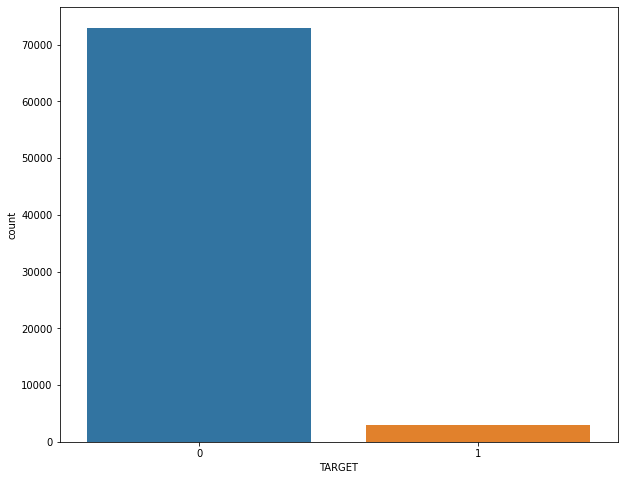

Percentage of happy customers:  96.0431465403841 %
Percentage of unhappy customers:  3.9568534596158904 %


In [24]:
# To check the distribution of data in the dataset
plt.figure(figsize = (10, 8))
sns.countplot(x = 'TARGET', data = train_data) # from the ouput we can say that it is an unbalanced data 
plt.show()
print('Percentage of happy customers: ',len(train_data[train_data['TARGET']==0])/len(train_data['TARGET'])*100,"%")
print('Percentage of unhappy customers: ',len(train_data[train_data['TARGET']==1])/len(train_data['TARGET'])*100,"%")

From the above data it is clear that dataset in unbalanced dataset

**Check Missing Value or Null Value**


In [74]:
train_data.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

Observations from above result:


1.   We don't have any missing values in the dataset



**Individual Fetaure Analysis**

In [29]:
train_data['var3'].describe()

count     76020.000000
mean      -1523.199277
std       39033.462364
min     -999999.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         238.000000
Name: var3, dtype: float64

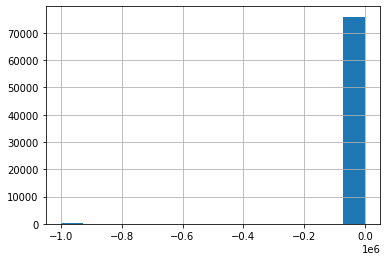

In [31]:
train_data['var3'].hist(bins=14)

Most of the customers (75%) have same value which means it represents a feature which is common among the customers which might be Gender or Country of the customer. 

In [32]:
train_data['var15'].describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

Text(0, 0.5, 'no of customers')

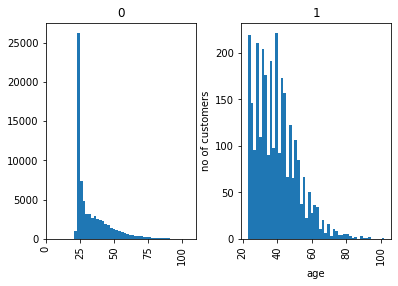

In [44]:
train_data['var15'].hist(by=train_data['TARGET'],bins=50)
plt.xlabel('age')
plt.ylabel('no of customers')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


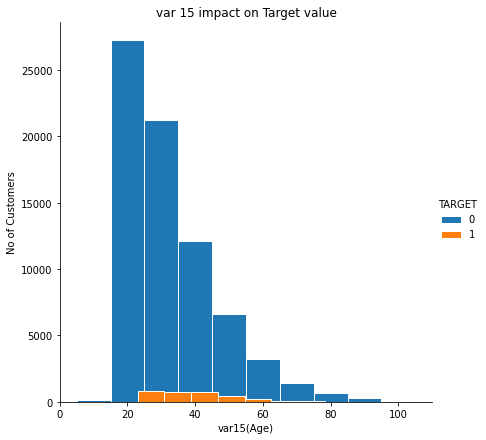

In [51]:
sns.FacetGrid(train_data, hue="TARGET", size=6) \
   .map(plt.hist, "var15",edgecolor='w') \
   .add_legend()
plt.xlabel("var15(Age)")
plt.ylabel("No of Customers")
plt.title('var 15 impact on Target value')
plt.show()

Observations from the above plot:


1.   Most unhappy customers are in the range of 25-50
2.   Most Happy customers are in the range of 21-24
3.   Most customers are in the age range(25-35)(45,000 cutomers)





In [52]:
train_data['var38'].describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f91106d6550>,
      dtype=object)

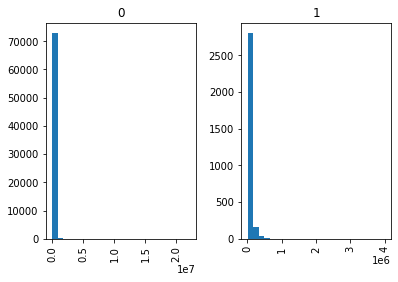

In [63]:
train_data['var38'].hist(by=train_data['TARGET'],bins=25)

In [64]:
import plotly.express as px
from matplotlib import rcParams
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [65]:
fig = px.bar(train_data, x="var15", y="var38", color="TARGET", barmode="group",labels={0,1},log_y=True,color_discrete_sequence=["green","red"])
fig.show()

In [72]:
unhappy = train_data.loc[train_data['TARGET']==1]["var38"]
happy = train_data.loc[train_data['TARGET']==0]["var38"]
hist_data=[unhappy,happy]
fig = ff.create_distplot(hist_data,group_labels=['unhappy','happy'],show_hist=False,show_rug=False)
fig['layout'].update(title='Santander Customer Satisfaction Time Density Plot',xaxis=dict(title='amount',range=[5000,2000000]))
iplot(fig,filename='dist_only')

Observations from the above plot:


1.   Most of the unhappy customers are having relationship value less than 0.4M
2.   Customers having relationship value greater than 0.5M have very less unhappy customers



**Constant and Duplicate features handling**

In [75]:
# Removing the data with constant features (i.e zero variance where std=0)
constant_features = [
    features for features in train_data.columns if train_data[features].std() == 0
]
len(constant_features)
train_data[constant_features]

,ind_var2_0,ind_var2,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var41,ind_var46_0,ind_var46,num_var27_0,num_var28_0,num_var28,num_var27,num_var41,num_var46_0,num_var46,saldo_var28,saldo_var27,saldo_var41,saldo_var46,imp_amort_var18_hace3,imp_amort_var34_hace3,imp_reemb_var13_hace3,imp_reemb_var33_hace3,imp_trasp_var17_out_hace3,imp_trasp_var33_out_hace3,num_var2_0_ult1,num_var2_ult1,num_reemb_var13_hace3,num_reemb_var33_hace3,num_trasp_var17_out_hace3,num_trasp_var33_out_hace3,saldo_var2_ult1,saldo_medio_var13_medio_hace3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
# Drop the constant features from traina and test dataset
train_data.drop(labels = constant_features, axis = 1, inplace=True)
test_data.drop(labels = constant_features, axis = 1, inplace = True)

In [77]:
# checking the shape of the dataset after dropping the constant features
print(train_data.shape,test_data.shape)

(76020, 337) (75818, 336)


In [78]:
# Find the columns where most of the values are equal( approx to 99.9% )
approx_constants = []
for feature in train_data.columns:
    approx_value = (train_data[feature].value_counts()/ np.float(
        len(train_data))).sort_values(ascending=False).values[0]
    if approx_value > 0.999:
      approx_constants.append(feature)
len(approx_constants)
train_data[approx_constants]

,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,ind_var6_0,ind_var6,ind_var13_medio_0,ind_var13_medio,ind_var18_0,ind_var18,ind_var29_0,ind_var29,ind_var33_0,ind_var33,ind_var34_0,ind_var34,num_var6_0,num_var6,num_var13_medio_0,num_var13_medio,num_var18_0,num_var18,num_op_var40_hace3,num_var29_0,num_var29,num_var33_0,num_var33,num_var34_0,num_var34,saldo_var6,saldo_var13_medio,saldo_var18,saldo_var29,saldo_var33,saldo_var34,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,...,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_emit_ult1,num_compra_var44_hace3,num_meses_var13_medio_ult3,num_meses_var29_ult3,num_meses_var33_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_reemb_var13_ult1,num_reemb_var17_hace3,num_reemb_var17_ult1,num_reemb_var33_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace3
0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76016,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76017,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76018,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# Temporary dataframe for approx_constants
train_data_ac=train_data.copy()
test_data_ac=test_data.copy()

In [80]:
# Drop the approximate constant features from traina and test dataset
train_data_ac.drop(labels = approx_constants, axis = 1, inplace=True)
test_data_ac.drop(labels = approx_constants, axis = 1, inplace = True)

In [81]:
print(train_data.shape,train_data_ac.shape,test_data.shape,test_data_ac.shape)

(76020, 337) (76020, 225) (75818, 336) (75818, 224)


In [82]:
# Remove duplicate data, columns having same values
duplicate_features=[]
# Applying modified sort algorithm , instead of sorting we are creating a features list which mets condition, ignoring other columns
for i in range(0, len(train_data.columns)):
    col_1 = train_data.columns[i]
    for col_2 in train_data.columns[i + 1:]:
        if train_data[col_1].equals(train_data[col_2]):
            duplicate_features.append(col_2)
len(duplicate_features)
train_data[duplicate_features]

,ind_var29_0,ind_var29,ind_var13_medio,ind_var18,ind_var26,ind_var25,ind_var32,ind_var34,ind_var37,ind_var39,num_var29_0,num_var29,num_var13_medio,num_var18,num_var26,num_var25,num_var32,num_var34,num_var37,num_var39,saldo_var29,saldo_medio_var13_medio_ult1,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,0,0.0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
76016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
76017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
76018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0


In [83]:
# Dropping the duplicate features from the dataset as their contribute towards prediction of target is neligible 
train_data.drop(labels = duplicate_features, axis = 1, inplace=True)
test_data.drop(labels = duplicate_features, axis = 1, inplace = True)

In [84]:
# Dropping the duplicate features from the dataset as their contribute towards prediction of target is neligible 
for feature in duplicate_features:
  if feature in train_data_ac and feature in test_data_ac:
    train_data_ac.drop(labels = feature, axis = 1, inplace=True)
    test_data_ac.drop(labels = feature, axis = 1, inplace = True)

In [85]:

print(train_data.shape,test_data.shape,train_data_ac.shape,test_data_ac.shape)

(76020, 308) (75818, 307) (76020, 215) (75818, 214)


**Feature Variance Analysis**

In [86]:
from sklearn.feature_selection import VarianceThreshold
def features_wo_low_variance(data):
  threshold_n=0.98  
  sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
  sel_var=sel.fit_transform(data)
  return data.columns[sel.get_support(indices=True)] 

In [87]:
(train_data.var() < 0.02).value_counts()

False    249
True      59
dtype: int64

We can remove the low variance(such as 0.02) features, as they might not have impact on target value

**Removing low variance features**

In [88]:
train_data_hv = train_data[features_wo_low_variance(train_data)].copy()
test_data_hv = test_data[features_wo_low_variance(train_data)[:-1]].copy()

In [89]:
print(train_data_hv.shape,test_data_hv.shape)

(76020, 249) (75818, 248)


In [90]:
# Dataset without accurate constants
train_data_ac_hv = train_data_ac[features_wo_low_variance(train_data_ac)].copy()
test_data_ac_hv = test_data_ac[features_wo_low_variance(train_data_ac)[:-1]].copy()

In [91]:
print(train_data_ac_hv.shape,test_data_ac_hv.shape)

(76020, 190) (75818, 189)


**Feature correlation analysis**
*   As correlation matrix is symmetric, it is reduandant to consider the whole matrix.
*   Instead we can consider either upper or lower triangle of the correaltion matrix.


In [92]:
def find_correlated_features(data):
  # Create correlation matrix
  corr_matrix = data.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find features with correlation greater than 0.95
  to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

  print(len(to_drop))
  return to_drop

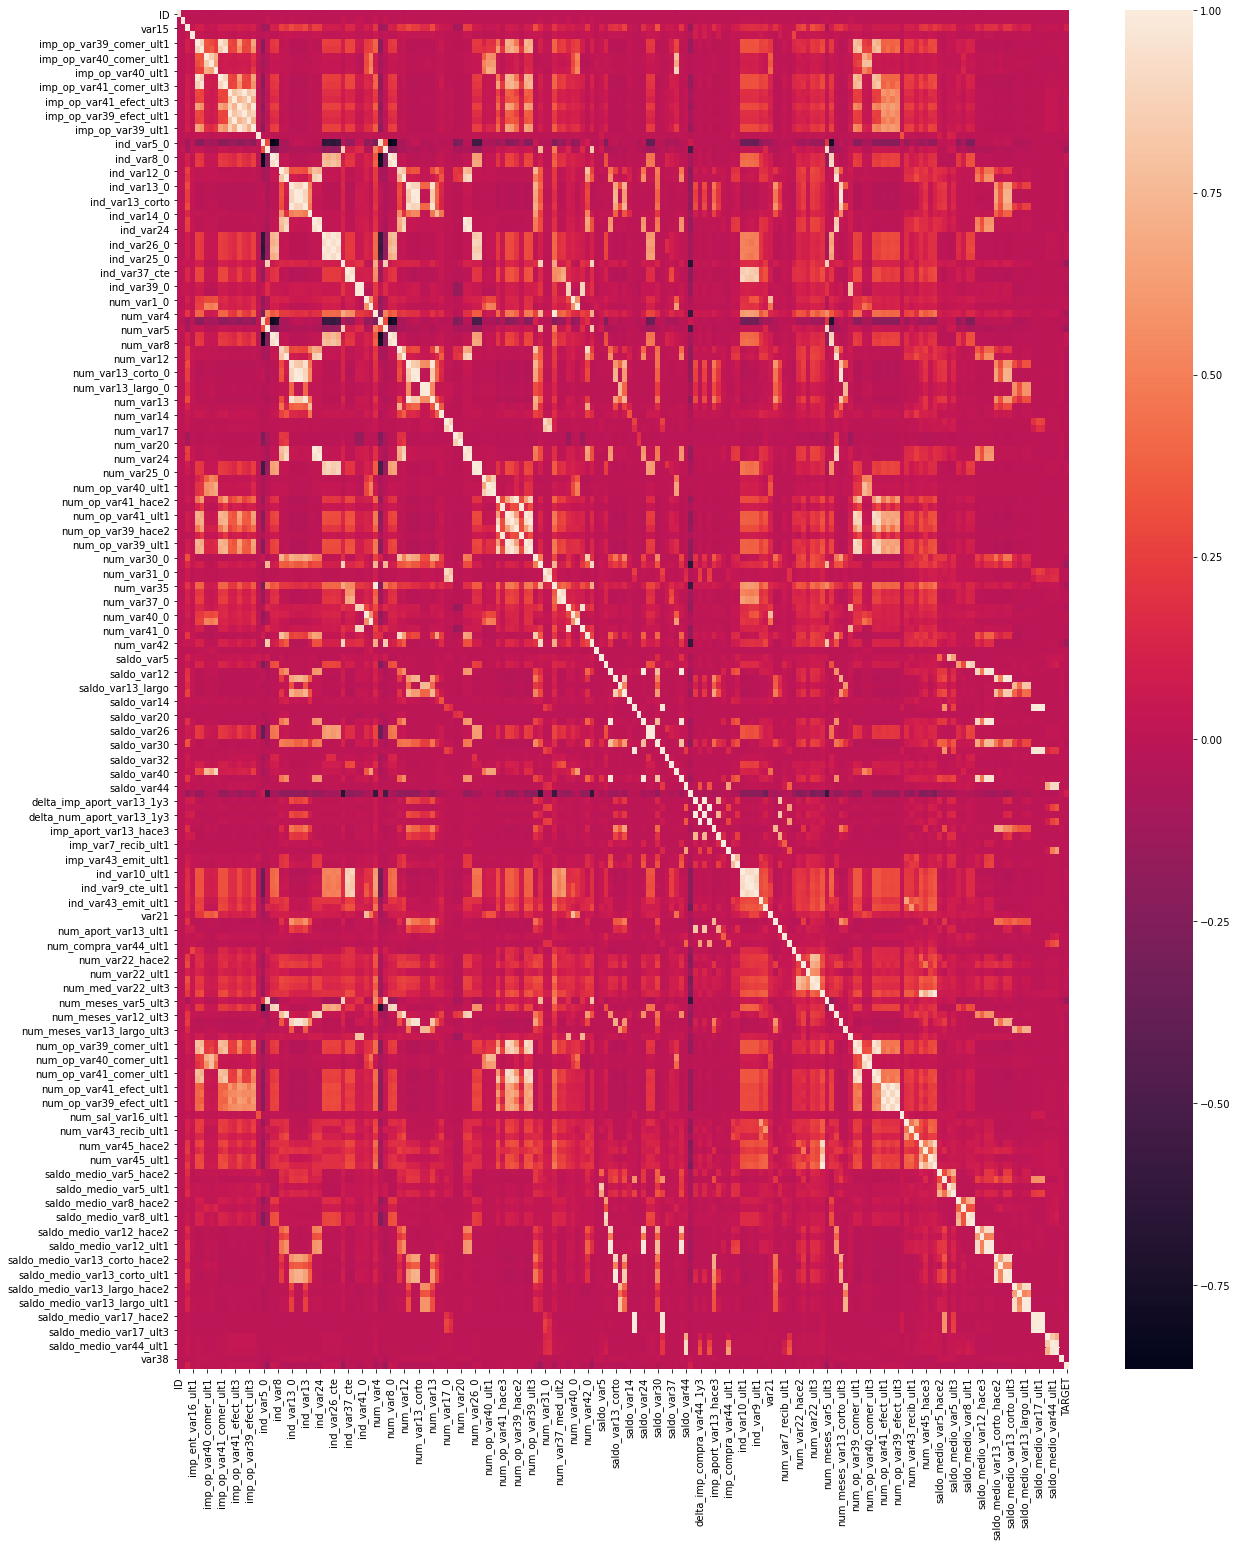

In [93]:
plt.figure(figsize = (20,25))
sns.heatmap(train_data_ac_hv.corr())

In [94]:
# Drop features having correlation greater than 0.95
train_data_hv_co= train_data_hv.drop(find_correlated_features(train_data_hv), axis=1)
test_data_hv_co= test_data_hv.drop(find_correlated_features(train_data_hv), axis=1)

70
70


In [95]:
# shape of the train_data after dropping high correlated features
print(train_data_hv_co.shape,test_data_hv_co.shape)

(76020, 179) (75818, 178)


In [96]:
# Drop features having correlation greater than 0.95
train_data_ac_hv_co= train_data_ac_hv.drop(find_correlated_features(train_data_ac_hv), axis=1)
test_data_ac_hv_co= test_data_ac_hv.drop(find_correlated_features(train_data_ac_hv), axis=1)

55
55


In [97]:
# shape of the train_data after dropping high correlated features
print(train_data_ac_hv_co.shape,test_data_ac_hv_co.shape)

(76020, 135) (75818, 134)


**Feature Outlier Analysis**


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

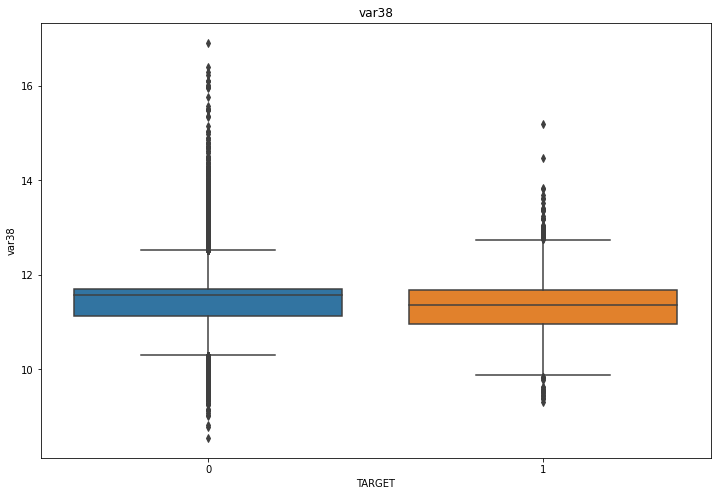

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

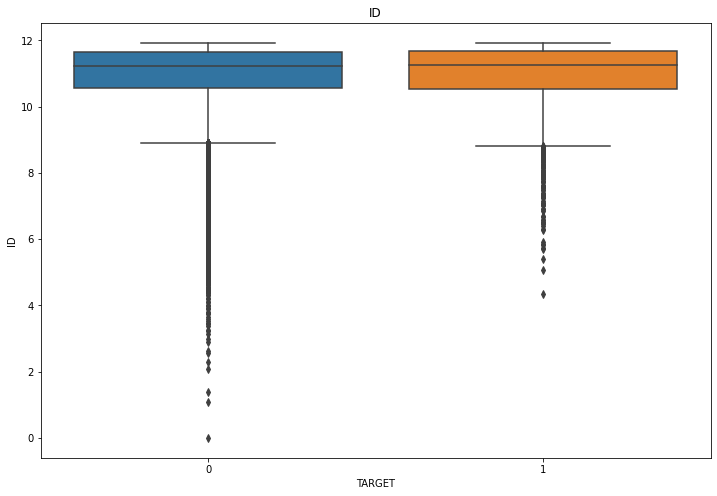

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [106]:
for feature in train_data[train_data_ac_hv_co.var().sort_values(ascending=False).index[0:10]]:
  plt.figure(figsize = (12, 8))
  data = train_data.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    sns.boxplot(y = feature, x = 'TARGET', data = data)
    plt.ylabel(feature)
    plt.title(feature)
    plt.yticks()
    plt.show()

In [99]:
# Calculating IQR
Q1 = train_data_ac_hv_co.quantile(0.25)
Q3 = train_data_ac_hv_co.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID                              75644.00
var3                                0.00
var15                              17.00
imp_ent_var16_ult1                  0.00
imp_op_var39_comer_ult1             0.00
                                  ...   
saldo_medio_var13_largo_ult1        0.00
saldo_medio_var44_hace2             0.00
saldo_medio_var44_ult1              0.00
var38                           50885.64
TARGET                              0.00
Length: 135, dtype: float64


In [100]:
# Finding outliers in the dataset
print(train_data_ac_hv_co < (Q1 - 1.5 * IQR)) or (train_data_ac_hv_co > (Q3 + 1.5 * IQR))

          ID   var3  var15  ...  saldo_medio_var44_ult1  var38  TARGET
0      False  False  False  ...                   False  False   False
1      False  False  False  ...                   False  False   False
2      False  False  False  ...                   False  False   False
3      False  False  False  ...                   False  False   False
4      False  False  False  ...                   False  False   False
...      ...    ...    ...  ...                     ...    ...     ...
76015  False  False  False  ...                   False  False   False
76016  False  False  False  ...                   False  False   False
76017  False  False  False  ...                   False  False   False
76018  False  False  False  ...                   False  False   False
76019  False  False  False  ...                   False  False   False

[76020 rows x 135 columns]


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_sal_var16_ult1,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var14_0,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var30,ind_var37_cte,ind_var37_0,ind_var39_0,num_var1_0,num_var1,num_var4,num_var5_0,num_var12_0,num_var13_largo_0,num_var14_0,num_var14,num_var17_0,num_var17,...,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var13_largo_ult3,num_meses_var39_vig_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var44_hace2,saldo_medio_var44_ult1,var38,TARGET
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [101]:
# Removing the outliers
train_data_ol=train_data_ac_hv_co.copy()
train_data_out = train_data_ol[((train_data_ol >= (Q1 - 1.5 * IQR)) & (train_data_ol <= (Q3 + 1.5 * IQR))).all(axis=1)]

In [102]:
train_data_out.shape

(27125, 135)

In [103]:
train_data_out["TARGET"].value_counts()

0    27125
Name: TARGET, dtype: int64

Observations from outlier analysis:
*    We are loosing valuable information if we are removing outliers
*    We can say that outliers are important in predicting the target value
*    Dataset reduced from (76020,135) to (27125,135) -- loosing valuable information.
*   So, we are not considering to remove the outliers

**Missing/garbage value treatment**

In [107]:
# Replacing value "-999999" in var3 column with most occuring value(75%) 2
train_data.var3 = train_data.var3.replace(-999999,2)

In [108]:
test_data.var3 = test_data.var3.replace(-999999,2)

In [112]:
test_data_hv_co.var3 = test_data_hv_co.var3.replace(-999999,2)
train_data_hv_co.var3 = train_data_hv_co.var3.replace(-999999,2)

In [109]:
test_data_ac.var3 = test_data_ac.var3.replace(-999999,2)
train_data_ac.var3 = train_data_ac.var3.replace(-999999,2)

In [110]:
test_data_ac_hv.var3 = test_data_ac_hv.var3.replace(-999999,2)
train_data_ac_hv.var3 = train_data_ac_hv.var3.replace(-999999,2)

In [111]:
test_data_ac_hv_co.var3 = test_data_ac_hv_co.var3.replace(-999999,2)
train_data_ac_hv_co.var3 = train_data_ac_hv_co.var3.replace(-999999,2)

## PCA Analysis

In [113]:
# Removing Target and ID columns to scale the data across all columns between -1 to 1
train_data_scaled2= train_data_hv_co.drop(["ID","TARGET"],axis=1)
train_data_scaled1= train_data_ac_hv_co.drop(["ID","TARGET"],axis=1)
train_data_scaled= train_data.drop(["ID","TARGET"],axis=1)

In [117]:
print(train_data_scaled.shape,train_data_scaled1.shape,train_data_scaled2.shape)

(76020, 306) (76020, 133) (76020, 177)


In [122]:
from sklearn.decomposition import PCA
def find_pca_components(data):
  pca = PCA().fit(data)
  plt.rcParams["figure.figsize"] = (12,6)

  fig, ax = plt.subplots()
  xi = np.arange(1, data.shape[1]+1, step=1)
  y = np.cumsum(pca.explained_variance_ratio_)

  plt.ylim(0.0,1.1)
  plt.plot(xi/2, y, marker='o', linestyle='--', color='b')

  plt.xlabel('Number of Components')
  plt.xticks(np.arange(0, data.shape[1]/2, step=2)) #change from 0-based array index to 1-based human-readable label
  plt.ylabel('Cumulative variance (%)')
  plt.title('The number of components needed to explain variance')
  plt.axhline(y=0.98, color='r', linestyle='-')
  plt.text(0.7, 0.85, '98% cut-off threshold', color = 'red', fontsize=16)
  print("Pca component prediciton:")
  ax.grid(axis='x')
  plt.show()

Pca component prediciton:


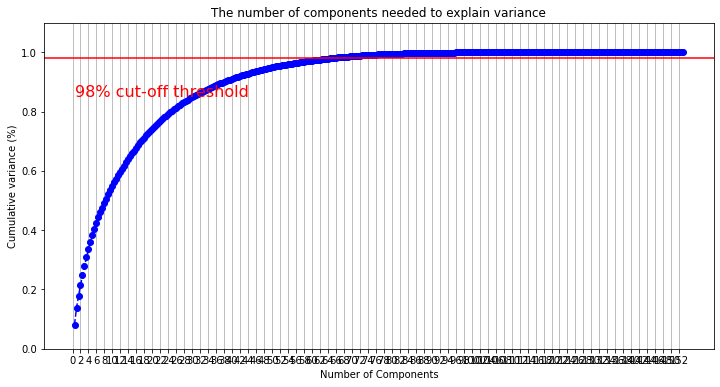

Pca component prediciton:


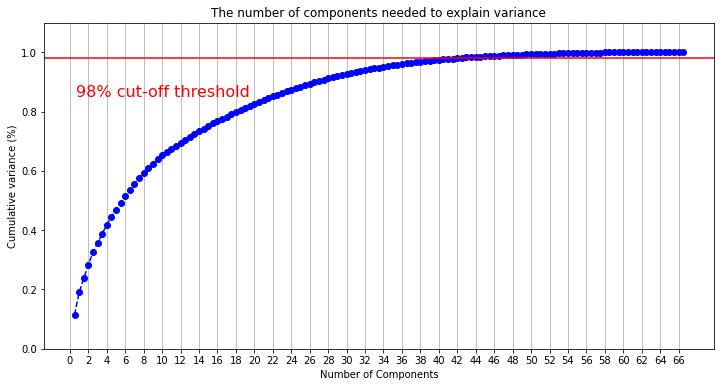

Pca component prediciton:


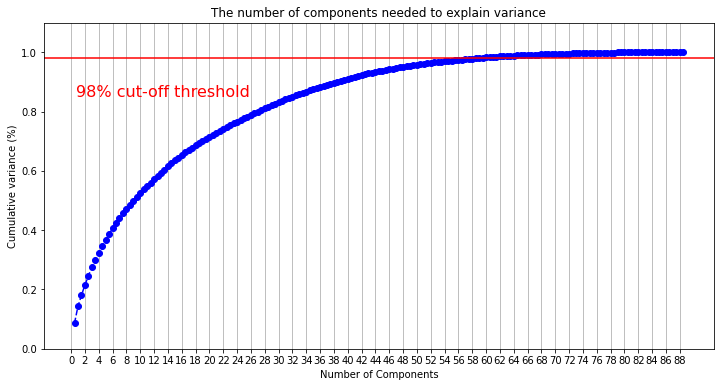

In [123]:
from sklearn.preprocessing import StandardScaler
for data in [train_data_scaled,train_data_scaled1,train_data_scaled2]:
  scaler = StandardScaler()
  find_pca_components(scaler.fit_transform(data))

From the above visualization, we can say that we need to have 48,44, and 60 pca components for each dataset respectively

In [124]:
def pca_analysis(n_co,data):
  pca = PCA(n_components=n_co)
  data_transformed = pca.fit_transform(data)
  print("PCA Analysis for %s pca components"%(n_co))
  print("Eigen vector for each principal component : ",pca.components_)
  print("Amount of variance by each PCA : ", pca.explained_variance_)
  print("Percentage of variance by each PCA : ", pca.explained_variance_ratio_)
  print("number of features in training data : ", pca.n_features_)
  print("number of samples in training data: ", pca.n_samples_)
  print("noise variance of the data : ",pca.noise_variance_)
  return pd.DataFrame(data_transformed)

In [126]:
data_transformed=[]
for no, data in [(48,train_data_scaled),(44,train_data_scaled1),(60,train_data_scaled2)]:
  scaler = StandardScaler()
  data_transformed.append(pca_analysis(no,scaler.fit_transform(data)))

PCA Analysis for 48 pca components
Eigen vector for each principal component :  [[ 2.11343354e-02  5.59329307e-02  1.33964789e-02 ...  1.16186536e-02
   1.17335649e-02  1.23699977e-03]
 [ 5.20532697e-04  8.22711547e-02  9.74784767e-03 ...  6.29262540e-03
   6.84672459e-03  5.10161675e-03]
 [ 2.63070206e-02  8.14421507e-03  2.11169154e-03 ...  1.04393045e-01
   1.09063343e-01  2.24554982e-03]
 ...
 [-2.50800025e-02 -1.52176756e-02  1.43604762e-02 ... -4.19615045e-03
  -2.94769185e-03 -7.82079533e-03]
 [-1.48188928e-01 -6.68377381e-02  6.07733153e-02 ...  1.12637487e-02
   2.78022503e-03  1.05988969e-02]
 [-6.59777922e-02 -2.83772319e-02  2.35062377e-02 ...  2.84930922e-02
   1.90447429e-02  1.55370062e-05]]
Amount of variance by each PCA :  [24.93897344 17.34037749 11.98789374 11.58611201  9.80506013  9.4151888
  9.18987166  8.56472975  7.5547006   6.76046239  6.51484066  6.12613049
  5.75730977  5.32406965  4.79828174  4.72746617  4.58566005  4.56687499
  4.24676621  4.00871295  3.8532

## Upsampling the data

As data is very unbalanced dataset, we will try to upsample the data with minority target

In [127]:
from sklearn.utils import resample
def upsampling_dataset(data):
  data_majority=data[data.TARGET==0] 
  data_minority=data[data.TARGET==1]  

  data_minority_upsampled=resample(data_minority,replace=True,n_samples=73012)
  data_upsampled=pd.concat([data_minority_upsampled,data_majority])

  data_upsampled.info()
  print(data_upsampled['TARGET'].value_counts())
  return data_upsampled

In [128]:
datasets = [train_data_ac,train_data_ac_hv_co,train_data_hv_co]

In [159]:
test_datasets = [test_data_ac,test_data_ac_hv_co,test_data_hv_co]

In [129]:
upsampled_data = []
for data in datasets:
  upsampled_data.append(upsampling_dataset(data))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146024 entries, 38754 to 76019
Columns: 215 entries, ID to TARGET
dtypes: float64(72), int64(143)
memory usage: 240.6 MB
1    73012
0    73012
Name: TARGET, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146024 entries, 8682 to 76019
Columns: 135 entries, ID to TARGET
dtypes: float64(52), int64(83)
memory usage: 151.5 MB
1    73012
0    73012
Name: TARGET, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146024 entries, 22090 to 76019
Columns: 179 entries, ID to TARGET
dtypes: float64(78), int64(101)
memory usage: 200.5 MB
1    73012
0    73012
Name: TARGET, dtype: int64


## Feature Selection


In [139]:
if 'ID' not in data_transformed[2]:
    data_transformed[2].insert(1,'ID',train_data['ID'])
x_pca = data_transformed[2]
y_pca = train_data["TARGET"]

In [140]:
x_upsample = upsampled_data[2].drop("TARGET",axis=1)
y_upsample = upsampled_data[2]["TARGET"]

In [141]:
x = datasets[2].drop("TARGET",axis=1)
y = datasets[2]["TARGET"]

In [142]:
print(x_pca.shape,y_pca.shape,x_upsample.shape,y_upsample.shape,x.shape,y.shape)

(76020, 61) (76020,) (146024, 178) (146024,) (76020, 178) (76020,)


In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=44)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y_pca, test_size=0.30, random_state=44)
X_upsample_train, X_upsample_test, y_upsample_train, y_upsample_test = train_test_split(x_upsample, y_upsample, test_size=0.30, random_state=44)

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [149]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=200))
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200, n_jobs=None,
                                                 oob_score=False,

In [150]:
selected_features = X_train.columns[(sel_.get_support())]
len(selected_features)

22

In [151]:
train_data[selected_features]

,ID,var15,imp_op_var41_efect_ult3,imp_op_var41_ult1,saldo_var5,saldo_var30,var36,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var39_vig_ult3,num_var45_hace2,num_var45_hace3,num_var45_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,1,23,0.0,0.0,0.00,0.00,99,0,0,0,0,0,0,2,0,0,0,0.00,0.00,0.00,0.00,39205.170000
1,3,34,0.0,0.0,0.00,300.00,3,0,0,0,0,0,1,2,0,0,0,0.00,88.89,0.00,0.00,49278.030000
2,4,23,0.0,0.0,3.00,3.00,99,0,0,0,0,0,3,1,0,0,0,3.00,0.18,3.00,2.07,67333.770000
3,8,37,0.0,195.0,70.62,70.62,2,3,0,0,3,15,2,1,27,3,18,186.09,0.00,91.56,138.84,64007.970000
4,10,39,0.0,0.0,0.00,135003.00,1,3,0,6,9,0,3,2,0,0,0,3.00,0.30,40501.08,13501.47,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,48,0.0,0.0,0.00,0.00,99,0,0,0,0,0,0,2,0,0,0,0.00,0.00,0.00,0.00,60926.490000
76016,151830,39,0.0,0.0,0.00,48191.22,2,24,0,0,24,15,1,2,36,3,9,130.65,0.00,0.00,0.00,118634.520000
76017,151835,23,0.0,0.0,3.00,3.00,99,0,0,0,0,0,2,1,0,0,0,3.00,0.00,3.00,3.00,74028.150000
76018,151836,25,0.0,0.0,3.00,3.00,99,0,0,0,0,0,3,2,0,0,0,3.00,1.74,3.00,2.58,84278.160000


## Model Building and Analysis

*  We have created different datasets such as : original dataset, dataset without constant and duplicate features, dataset without constant,duplicate features,low variance,and correlated features and their PCA transformed data, upsampled datasets
*  We will use above datasets to train the model using below algorithms
1.   Logistic regression
2.   Random Forest
3.   Decision Tree
4.   Bagging classifier
5.   Support vector classifier
6.   Gradient Boosting classifier
7.   kNearest neighbors classifier




In [130]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [153]:
# Model preparation
models = []
models.append(('LR', LogisticRegression(class_weight='balanced')))
models.append(('Bagging Classifier',BaggingClassifier()))
models.append(('KNN', KNeighborsClassifier(weights='distance')))
models.append(('RandomForest', RandomForestClassifier(class_weight='balanced')))
models.append(('DecisionTree', DecisionTreeClassifier(class_weight='balanced')))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('xgb', XGBClassifier(missing=np.nan, max_depth=6, 
n_estimators=350, learning_rate=0.025, nthread=4, subsample=0.95,
colsample_bytree=0.85, seed=4242)))

In [134]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import f1_score,roc_curve,roc_auc_score,precision_score,recall_score,accuracy_score

In [136]:
def model_comparison_plot(model_metrics):
  plt.figure(figsize = (12,4))
  sns.heatmap(model_metrics, annot=True, cmap=sns.light_palette((210, 90, 60), input="husl"),linewidth=2)
  plt.title('Metrics comparison for diff models')
  plt.show()

In [137]:
def plot_roc_curve(y_test, prob_dict):
  sns.set_style('whitegrid')
  plt.figure()
  i=0
  fig, ax = plt.subplots(4,2,figsize=(16,30))
  for key,prob in prob_dict.items():
    fpr, tpr, thresholds = metrics.roc_curve( y_test, prob,
                                                  drop_intermediate = False )
    roc_auc = metrics.roc_auc_score( y_test, prob)
    i+= 1
    plt.subplot(4,2,i)
    plt.plot( fpr, tpr, color='red',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.axis('tight')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(key)
  plt.show()

In [138]:
def model_analysis(title,x_train,y_train,x_test,y_test):
  df_scores=pd.DataFrame()
  pred_dict={}
  for name,model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    pred_dict[name] = y_pred
    confusion = confusion_matrix(y_test,y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = metrics.accuracy_score(y_test, y_pred)
    error = 1-accuracy
    sensitivity = TP / float(FN + TP)
    specificity = TN / (TN + FP)
    False_positive_rate = 1-specificity
    precision = TP / float(TP + FP)
    bal_acc = metrics.balanced_accuracy_score(y_test, y_pred)
    Null_accuracy = max(y_test.mean(), (1 - y_test.mean()))
    f1 = metrics.f1_score(y_test,y_pred)
    auc_score = metrics.roc_auc_score(y_test,y_pred)
    clf_score = pd.DataFrame(
        {name: [accuracy, bal_acc, Null_accuracy,precision,sensitivity,f1,error,specificity,auc_score]},
        index=['Accuracy', 'Balanced accuracy','Null_accuracy','precision','recall','f1 score','error','specificity','auc_score']
    )
   
    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
  print("Roc_curve for all models")
  plot_roc_curve(y_test,pred_dict)
  print(title,end='\n\n')
  print(df_scores.to_markdown(),end='\n\n')
  model_comparison_plot(df_scores)

Roc_curve for all models


<Figure size 864x432 with 0 Axes>

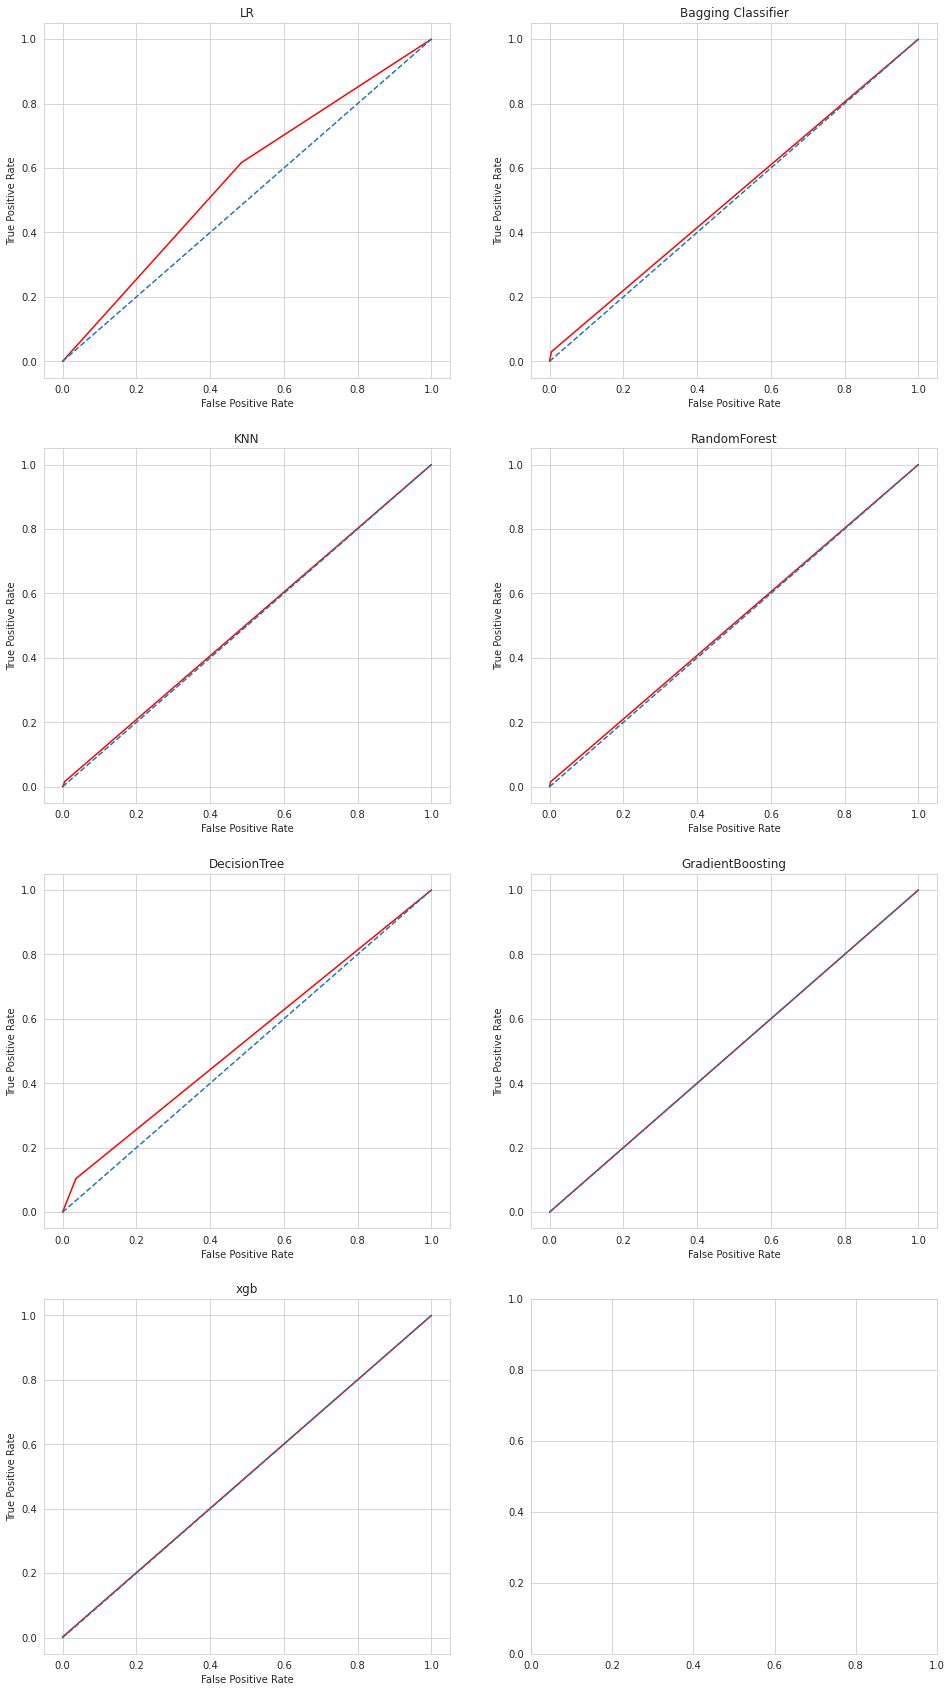

Model with normal data

|                   |    LR |   Bagging Classifier |   KNN |   RandomForest |   DecisionTree |   GradientBoosting |   xgb |
|:------------------|------:|---------------------:|------:|---------------:|---------------:|-------------------:|------:|
| Accuracy          | 0.519 |                0.957 | 0.955 |          0.958 |          0.93  |              0.96  | 0.96  |
| Balanced accuracy | 0.566 |                0.512 | 0.505 |          0.506 |          0.534 |              0.5   | 0.501 |
| Null_accuracy     | 0.961 |                0.961 | 0.961 |          0.961 |          0.961 |              0.961 | 0.961 |
| precision         | 0.05  |                0.189 | 0.097 |          0.177 |          0.106 |              0.071 | 0.4   |
| recall            | 0.617 |                0.03  | 0.017 |          0.016 |          0.104 |              0.001 | 0.002 |
| f1 score          | 0.092 |                0.052 | 0.028 |          0.029 |          0.105 |              

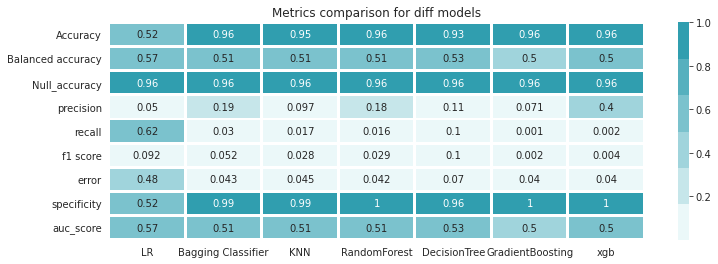

,LR,Bagging Classifier,KNN,RandomForest,DecisionTree,GradientBoosting,xgb
Accuracy,0.519,0.957,0.955,0.958,0.930,0.960,0.960
Balanced accuracy,0.566,0.512,0.505,0.506,0.534,0.500,0.501
Null_accuracy,0.961,0.961,0.961,0.961,0.961,0.961,0.961
precision,0.050,0.189,0.097,0.177,0.106,0.071,0.400
recall,0.617,0.030,0.017,0.016,0.104,0.001,0.002
f1 score,0.092,0.052,0.028,0.029,0.105,0.002,0.004
error,0.481,0.043,0.045,0.042,0.070,0.040,0.040
specificity,0.515,0.995,0.994,0.997,0.964,0.999,1.000
auc_score,0.566,0.512,0.505,0.506,0.534,0.500,0.501


In [154]:
model_analysis("Model with normal data",X_train,y_train,X_test,y_test)

Roc_curve for all models


<Figure size 864x432 with 0 Axes>

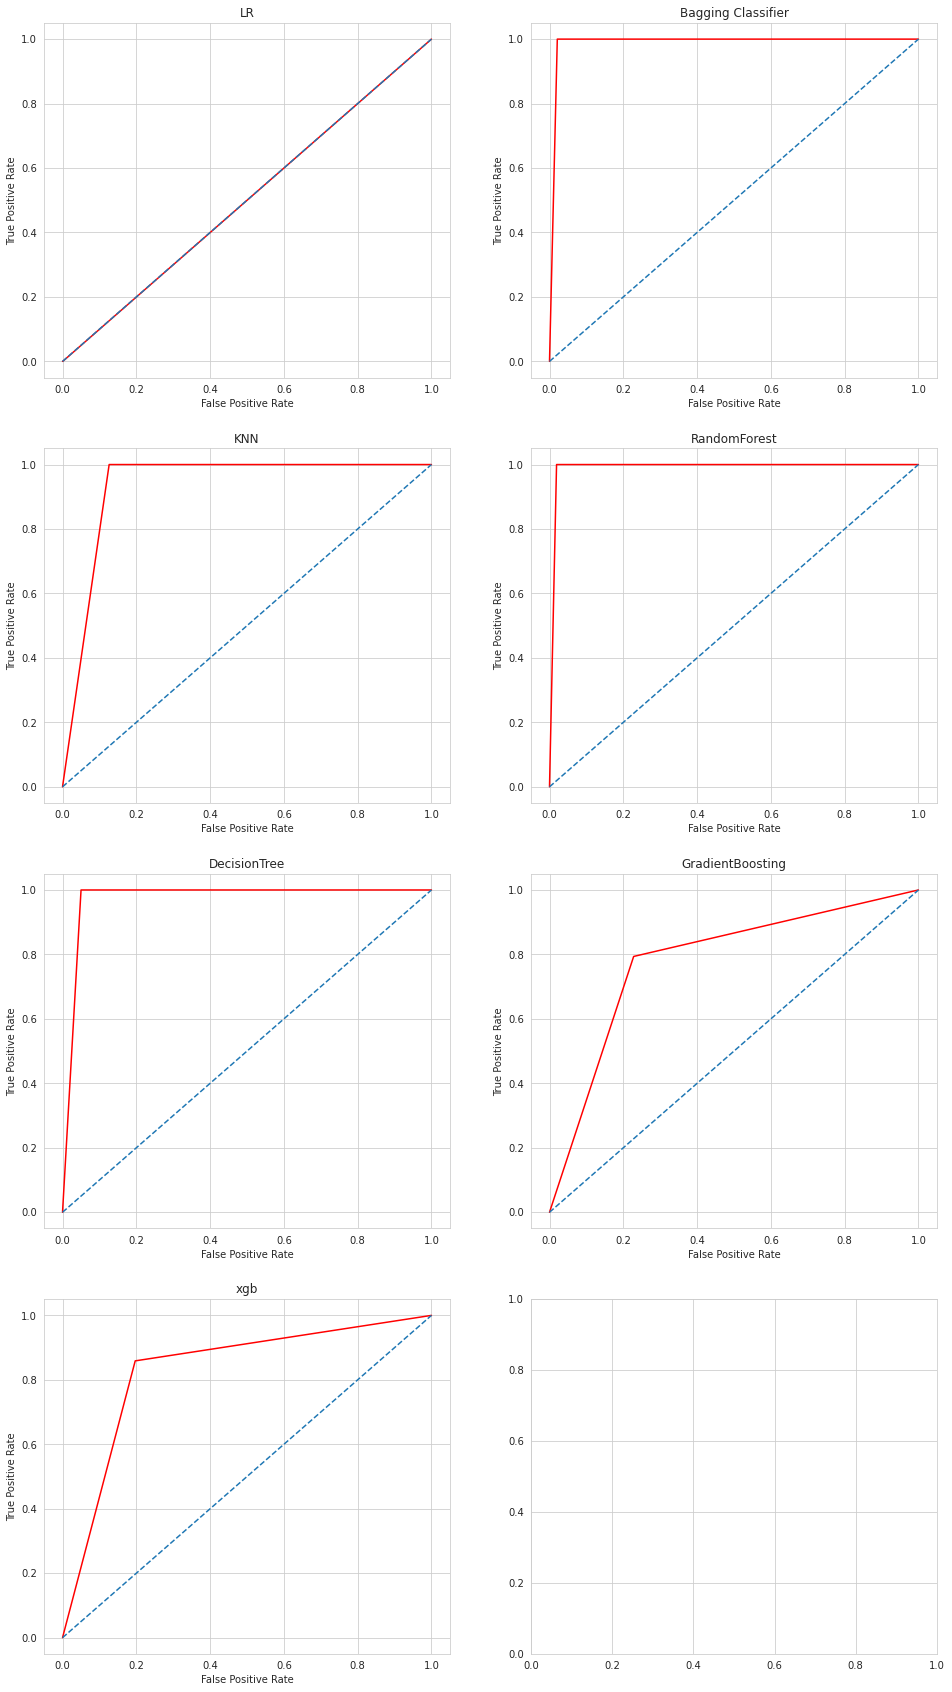

Model with upsampled data

|                   |    LR |   Bagging Classifier |   KNN |   RandomForest |   DecisionTree |   GradientBoosting |   xgb |
|:------------------|------:|---------------------:|------:|---------------:|---------------:|-------------------:|------:|
| Accuracy          | 0.5   |                0.989 | 0.937 |          0.99  |          0.975 |              0.783 | 0.831 |
| Balanced accuracy | 0.5   |                0.989 | 0.937 |          0.99  |          0.975 |              0.783 | 0.831 |
| Null_accuracy     | 0.5   |                0.5   | 0.5   |          0.5   |          0.5   |              0.5   | 0.5   |
| precision         | 0.343 |                0.979 | 0.888 |          0.981 |          0.952 |              0.777 | 0.813 |
| recall            | 0.001 |                1     | 1     |          1     |          1     |              0.794 | 0.859 |
| f1 score          | 0.001 |                0.99  | 0.941 |          0.991 |          0.975 |           

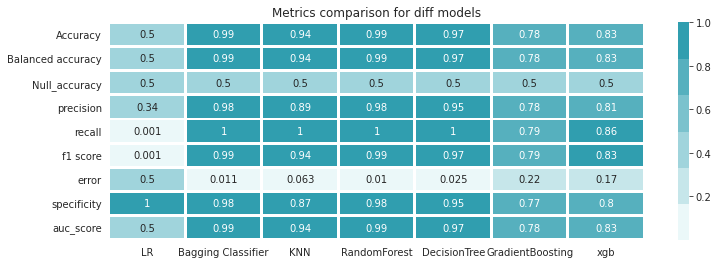

,LR,Bagging Classifier,KNN,RandomForest,DecisionTree,GradientBoosting,xgb
Accuracy,0.500,0.989,0.937,0.990,0.975,0.783,0.831
Balanced accuracy,0.500,0.989,0.937,0.990,0.975,0.783,0.831
Null_accuracy,0.500,0.500,0.500,0.500,0.500,0.500,0.500
precision,0.343,0.979,0.888,0.981,0.952,0.777,0.813
recall,0.001,1.000,1.000,1.000,1.000,0.794,0.859
f1 score,0.001,0.990,0.941,0.991,0.975,0.785,0.835
error,0.500,0.011,0.063,0.010,0.025,0.217,0.169
specificity,0.999,0.979,0.874,0.981,0.950,0.772,0.803
auc_score,0.500,0.989,0.937,0.990,0.975,0.783,0.831


In [155]:
model_analysis("Model with upsampled data",X_upsample_train,y_upsample_train,X_upsample_test,y_upsample_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning:

invalid value encountered in true_divide



Roc_curve for all models


<Figure size 864x432 with 0 Axes>

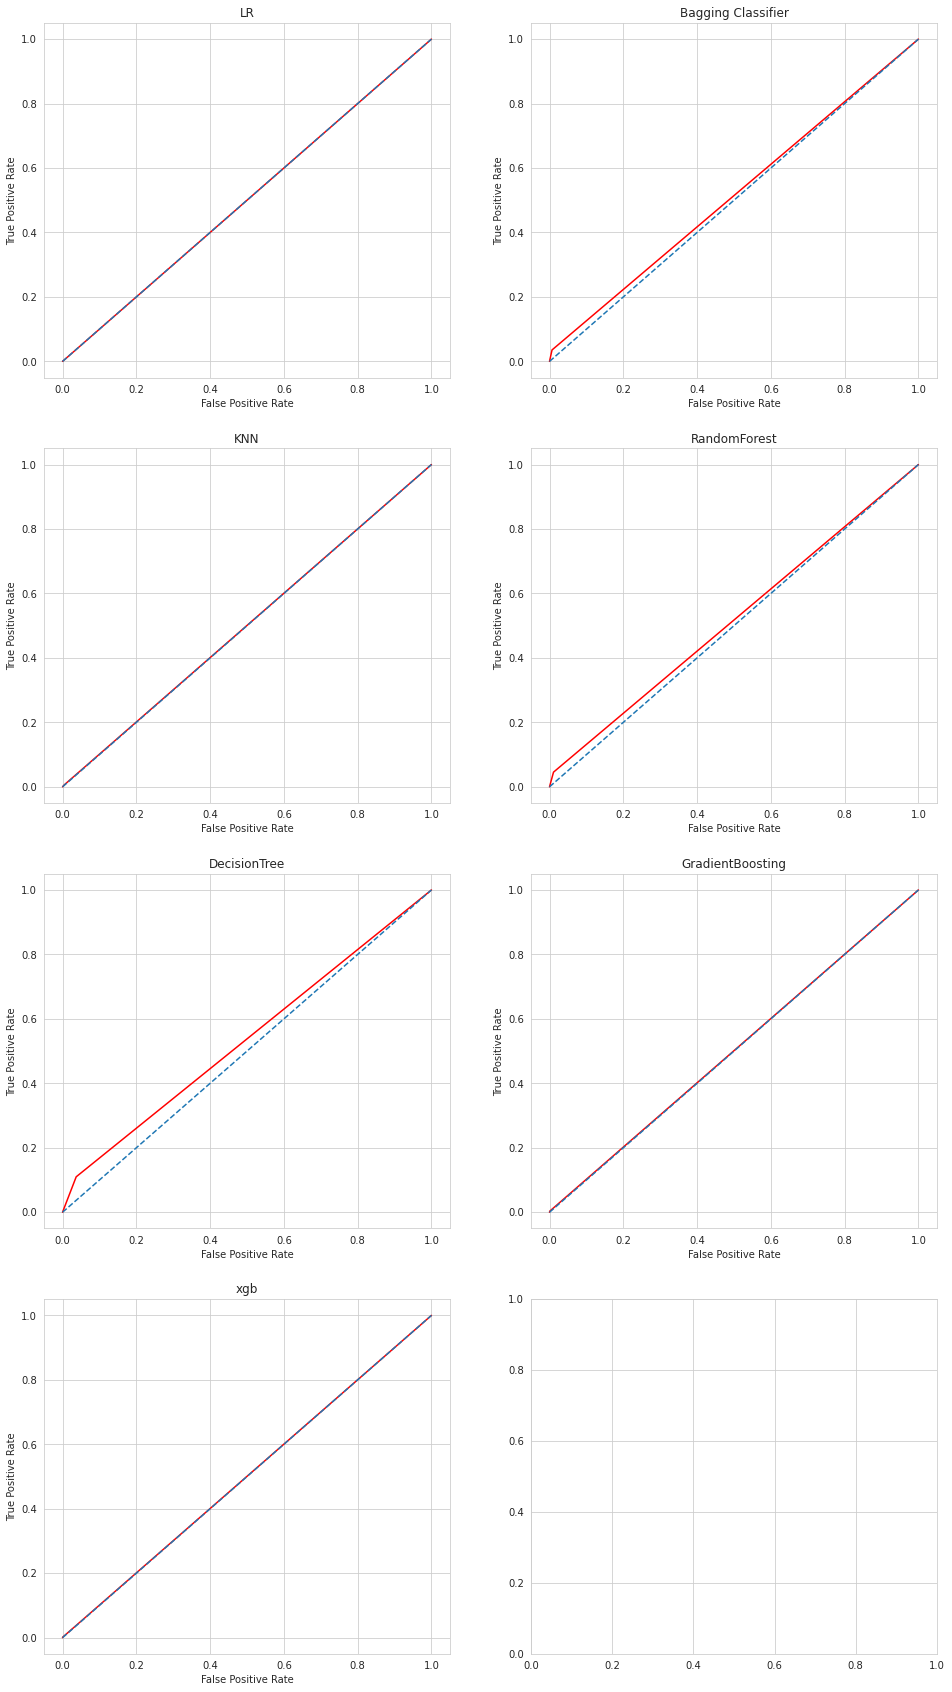

Model with pca data

|                   |      LR |   Bagging Classifier |   KNN |   RandomForest |   DecisionTree |   GradientBoosting |   xgb |
|:------------------|--------:|---------------------:|------:|---------------:|---------------:|-------------------:|------:|
| Accuracy          |   0.961 |                0.955 | 0.956 |          0.952 |          0.929 |              0.96  | 0.961 |
| Balanced accuracy |   0.5   |                0.514 | 0.501 |          0.517 |          0.536 |              0.501 | 0.501 |
| Null_accuracy     |   0.961 |                0.961 | 0.961 |          0.961 |          0.961 |              0.961 | 0.961 |
| precision         | nan     |                0.176 | 0.049 |          0.147 |          0.109 |              0.167 | 0.5   |
| recall            |   0     |                0.036 | 0.007 |          0.046 |          0.11  |              0.003 | 0.001 |
| f1 score          |   0     |                0.059 | 0.012 |          0.07  |          0.109 | 

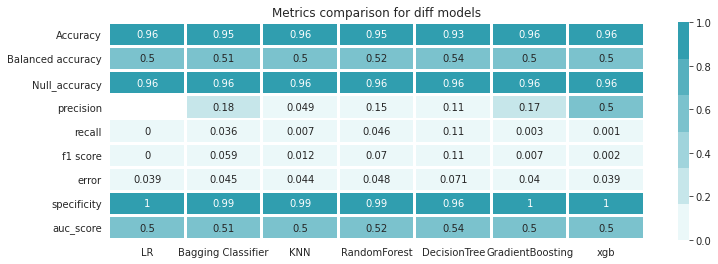

,LR,Bagging Classifier,KNN,RandomForest,DecisionTree,GradientBoosting,xgb
Accuracy,0.961,0.955,0.956,0.952,0.929,0.960,0.961
Balanced accuracy,0.500,0.514,0.501,0.517,0.536,0.501,0.501
Null_accuracy,0.961,0.961,0.961,0.961,0.961,0.961,0.961
precision,NaN,0.176,0.049,0.147,0.109,0.167,0.500
recall,0.000,0.036,0.007,0.046,0.110,0.003,0.001
f1 score,0.000,0.059,0.012,0.070,0.109,0.007,0.002
error,0.039,0.045,0.044,0.048,0.071,0.040,0.039
specificity,1.000,0.993,0.995,0.989,0.963,0.999,1.000
auc_score,0.500,0.514,0.501,0.517,0.536,0.501,0.501


In [156]:
model_analysis("Model with pca data",X_pca_train,y_pca_train,X_pca_test,y_pca_test)

Observations from above model results:
*   Among all the datasets, upsampled dataset is performing good acorss all models except logistic regression.
*   Bagging classifier, Decision Tree, Random Forest, K nearest neighboirs, and XGB classifier performing well across all metrics.
*   Bagging classifier and Decision Tree seems to overfit the model

## Predicting the probability of every customer is unhappy

In [157]:
final_model = RandomForestClassifier(class_weight='balanced',random_state=42)

In [158]:
final_model.fit(X_upsample_train,y_upsample_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [160]:
probs = final_model.predict_proba(test_data_hv_co)

In [164]:
submission = pd.DataFrame({"ID":test_data_hv_co.ID, "TARGET": probs[:,1]})

In [163]:
submission.to_csv("santander_solution.csv")

In [165]:
submission

,ID,TARGET
0,2,0.20
1,5,0.11
2,6,0.00
3,7,0.31
4,9,0.00
...,...,...
75813,151831,0.44
75814,151832,0.64
75815,151833,0.22
75816,151834,0.17


In [168]:
from sklearn.calibration import CalibratedClassifierCV
xgb_classifier = XGBClassifier(missing=np.nan, max_depth=6, 
n_estimators=350, learning_rate=0.025, nthread=4, subsample=0.95,
colsample_bytree=0.85, seed=4242)
xgb_mdl = CalibratedClassifierCV(xgb_classifier, method='isotonic', cv=10)
xgb_mdl.fit(X_upsample_train,y_upsample_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.85,
                                                    gamma=0,
                                                    learning_rate=0.025,
                                                    max_delta_step=0,
                                                    max_depth=6,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=350, n_jobs=1,
                                                    nthread=4,
                                                    objective='binary:logistic',
           

In [170]:
probs_xgb = xgb_mdl.predict_proba(test_data_hv_co)

In [171]:
submission1 = pd.DataFrame({"ID":test_data_hv_co.ID, "TARGET": probs_xgb[:,1]})

In [172]:
submission1.to_csv("submission_xgb.csv",index=False)